# Context

Analysis of the temporal and spatial energy (derived measures).

# Imports

In [1]:
from skimage import io
import skimage
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, uniform_filter
import pickle

In [2]:
import imageio
from pathlib import Path
from matplotlib.pyplot import show
from argparse import ArgumentParser

from pyoptflow.plots import compareGraphs

In [3]:
from PIL import Image
import os
from scipy.signal import argrelextrema
from skimage import exposure

In [4]:
import matplotlib
import matplotlib.animation
from IPython.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 2**128

### Import our custom utility methods

In [5]:
import sys
%reload_ext autoreload
%autoreload 2
sys.path.append('../..')

from utils.visualization_tools import *
import utils.visualization_tools
from utils.data_transformations import *
import utils.data_transformations
from utils.diverse import *
import utils.diverse

In [6]:
datasets_folder = "../../../../datasets/contrast_to_pixelwise_mean/"
files = [f for f in os.listdir(datasets_folder) if "_mean" in f]
files.sort()
means = [np.load(os.path.join(datasets_folder, f)) for f in files]

In [7]:
files

['runstart13_mean.npy',
 'runstart16_mean.npy',
 'runstart20_mean.npy',
 'runstart23_mean.npy',
 'runstart26_mean.npy']

# Vector field magnitude

$\left|v\right|=\left|v_1v_2\right|=\sqrt{\left|v_1\right|^2+\left|v_2\right|^2}$

In [9]:
root = "../../../../"
optical_flow_folder = os.path.join(root,"datasets/optical_flow_magnitude/")
tensor_files = [f for f in os.listdir(optical_flow_folder) if not "_mean" in f and ".npy" in f]
tensor_files.sort()

In [ ]:
magnitudes = []
for file in tensor_files:
    print(".", end = "")
    magn = np.load(os.path.join(optical_flow_folder, file))
    integral = np.sum(magn, axis=(1,2))
    magnitudes.append(integral)

In [50]:
min_vals = [ ]
max_vals = []

In [52]:
for file in tensor_files:
    print(".", end= "")
    t = np.load(os.path.join(optical_flow_folder, file))
    max_val = np.nanmax(t)
    min_val = np.nanmin(t)
    min_vals.append(min_val)
    max_vals.append(max_val)

.....

.....

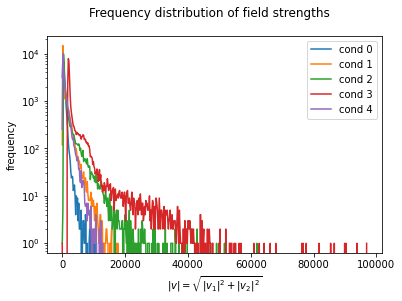

In [49]:
fig, ax = plt.subplots(1)
fig.suptitle("Frequency distribution of field strengths")
for i, [his, bins] in enumerate(zip(histograms, bins_of_hists)):
    print(".", end="")
    ax.set_yscale('log')
    ax.plot(bins[:-1],his, label = "cond " + str(i))
    ax.set_xlabel(r"$\left|v\right|=\sqrt{\left|v_1\right|^2+\left|v_2\right|^2}$")
    ax.set_ylabel("frequency")
    
ax.legend()